In [1]:
import treecorr
import GCRCatalogs
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
%matplotlib inline

In [18]:
def nk_correlation(zlo, zhi):
    nk = treecorr.NKCorrelation(nbins=20, min_sep=(2.5/60)*(np.pi/180), max_sep=(100./60)*(np.pi/180))
    
    mask_redshift = (data['redshift']>zlo)*(data['redshift']<zhi) #the foreground shear?
    ra0 = data['ra'][mask_redshift]
    dec0 = data['dec'][mask_redshift]
    
    #restrict galaxies to the same octant where we have Kcmb data (in degrees)
    mask_N = (ra0>0)*(ra0<90)*(dec0<0)
    ra_N = ra0[mask_N]
    dec_N = dec0[mask_N]
    
    cat_N = treecorr.Catalog(ra=ra0, dec=dec0, ra_units='deg', dec_units='deg')
    
    nk.process(cat_N, cat_K)
    xi = nk.xi
    R = np.exp(nk.logr)
    return xi, R

In [3]:
filename = '/global/projecta/projectdirs/lsst/groups/CS/cosmoDC2/mass_sheets_behind_z3/cmb_maps/cmblensmap_total_gausshiz_masked.fits'

In [4]:
mapfile = hp.read_map(filename)
print(len(mapfile))

NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
201326592


In [5]:
index = np.arange(201326592)

In [6]:
theta, phi = hp.pix2ang(nside=4096, ipix=index)
mask_kcmb = (phi>0)*(phi<np.pi/2)*(theta>np.pi/2)
print(True in mask_kcmb)

True


In [7]:
kcmb = mapfile[mask_kcmb]
ra_K = phi[mask_kcmb]
dec_K = np.pi/2-theta[mask_kcmb]
print(kcmb)

[ 0.00170215  0.09302823  0.09426145 ... -0.06422222 -0.12017739
 -0.09952184]


In [16]:
cat_K = treecorr.Catalog(ra=ra_K, dec=dec_K, k=kcmb, ra_units='rad', dec_units='rad')

In [9]:
gc = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_small')

In [10]:
data = gc.get_quantities(['ra', 'dec', 'redshift'], filters=['mag_r_lsst<28'])

In [20]:
redshift_min = np.linspace(0.5, 3, 6)
print(redshift_min)

[0.5 1.  1.5 2.  2.5 3. ]


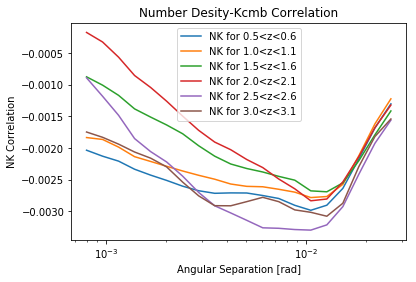

In [23]:
for z in redshift_min:  
    xi, R = nk_correlation(z, z+0.1)
    plt.semilogx(R, xi, label='NK for '+str(round(z,1))+'<z<'+str(round(z+0.1,1)))
plt.legend()
plt.xlabel('Angular Separation [rad]')
plt.ylabel('NK Correlation')
plt.title('Number Desity-Kcmb Correlation')
plt.savefig("NK_Correlation.png", dpi=200)
plt.show()